# Dynamic WSCC 9-bus System with Switch

In [1]:
from dataprocessing.dpsim import *
from dataprocessing.plottools import *

### Read log files and list all column names

In [2]:
path = '../../../Logs/'
logName = 'WSCC-9bus_dyn_switch_LeftVector'
logFilename = path + logName + '.csv'
print(logFilename)

ts_dpsim = read_timeseries_dpsim(logFilename)

../../../Logs/WSCC-9bus_dyn_switch_LeftVector.csv
DPsim results real column names: []
DPsim results complex column names: ['node00000', 'node00001', 'node00002', 'node00003', 'node00004', 'node00005', 'node00006', 'node00007', 'node00008', 'node00009', 'node00010', 'node00011', 'node00012', 'node00013', 'node00014', 'node00015', 'node00016', 'node00017', 'node00018', 'node00019', 'node00020', 'node00021', 'node00022', 'node00023', 'node00024', 'node00025', 'node00026']
DPsim results variable number: 27
DPsim results length: 1000


### Phasors at first time step

In [3]:
phasors = get_node_voltage_phasors(ts_dpsim)
for node, phasor in phasors.items():
    print(node + ': ' + str(phasor['abs'].values[0]) + '<' + str(phasor['phase'].values[0]))

node00000: 14143.999223733577<4.857469980723884
node00001: 218644.34370811793<-4.16251154962029
node00002: 222216.6918682762<-3.761450136358205
node00003: 229023.7308699678<-2.326825040774141
node00004: 17159.47056475069<-0.014699889602934687
node00005: 18448.55716334738<9.668739871400525
node00006: 229396.2785662104<3.947308347853774
node00007: 230944.15963310306<2.081339740271138
node00008: 225188.55623798643<0.8091640551572143
node00009: 17958.442476259694<2.2268969871352695
node00010: 6364.466720254887<131.80217705868733
node00011: 19871.80075683379<19.629700584806198
node00012: 9316.880603755422<171.56700920828717
node00013: 15228.078745852215<12.71192065821014
node00014: 6615.024053416133<160.52281714220712
node00015: 219638.32267383943<-4.4466566295983
node00016: 223465.55859377168<-4.02092463599404
node00017: 223011.06012393555<4.281159905835248
node00018: 227898.7796507408<4.037414842345308
node00019: 230282.96365872337<2.232337007198375
node00020: 225522.4638207816<2.34067431

### Phasors at last time step

In [4]:
for node, phasor in phasors.items():
    print(node + ': ' + str(phasor['abs'].values[-1]) + '<' + str(phasor['phase'].values[-1]))

node00000: 16337.491462712129<86.78949641462631
node00001: 213039.7986939614<-5.096634807465435
node00002: 218969.23295096026<-0.17598923533234545
node00003: 222817.94081089634<-4.499565596372028
node00004: 16919.846118797963<-1.1084339045015403
node00005: 18402.476643557762<10.498043101113119
node00006: 227534.13126405212<5.562981825438533
node00007: 2341502.6407495253<-36.03222720952176
node00008: 230324.6887204559<8.907792667361507
node00009: 17958.449300264107<2.101592202280503
node00010: 61240.31465695289<78.49555560913642
node00011: 19871.79553698359<19.092170125423877
node00012: 62822.340510638416<84.77161128905387
node00013: 15228.078332686662<15.583972255938994
node00014: 172463.95905080254<-106.83021556008255
node00015: 213447.43305100323<-6.310301045461714
node00016: 213512.14683874638<-8.532255719324123
node00017: 215874.05281858187<1.8755770479830567
node00018: 236266.50998356516<11.735649946518068
node00019: 2356527.9506768<-36.954197939564274
node00020: 2364775.836731465

### Phasors at last time step in per unit

In [5]:
nominal_voltages = {'node00000': 13800, 'node00001': 230000, 'node00002': 230000, 
                    'node00003': 230000, 'node00004': 16500, 'node00005': 18000, 
                    'node00006': 230000, 'node00007': 230000, 'node00008': 230000} 
for node, nom_voltage in nominal_voltages.items():
    print(node + ': ' + str(phasors[node]['abs'].values[0] / nom_voltage) + '<' + str(phasors[node]['phase'].values[0]))

node00000: 1.024927479980694<4.857469980723884
node00001: 0.9506275813396432<-4.16251154962029
node00002: 0.9661595298620704<-3.761450136358205
node00003: 0.9957553516085557<-2.326825040774141
node00004: 1.0399679130151933<-0.014699889602934687
node00005: 1.0249198424081878<9.668739871400525
node00006: 0.9973751242009149<3.947308347853774
node00007: 1.0041050418830568<2.081339740271138
node00008: 0.9790806792955932<0.8091640551572143


### Plot node phase
The phase at node00007 is not initialized properly since the CIM load flow data is not accurate. Therefore, the steady-state initialization implemented in the MNA solver is executed first so that the initial phase at t=0 is already very close to the correct one.
Using PI-lines with parallel impedances to ground not only during the initialization but also the simulation or more accurate CIM load flow results would probably further improve the results because the values around node00007 have still not converged completely.

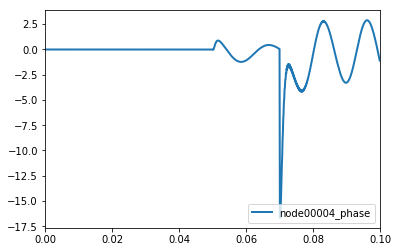

In [6]:
plot_timeseries(1, phasors['node00004']['phase'])

### Plot node voltages

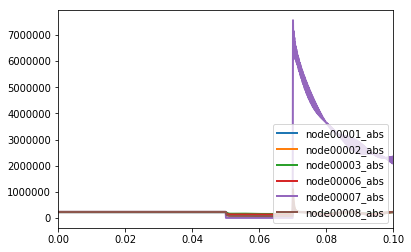

In [7]:
plot_timeseries(2, phasors['node00001']['abs'])
plot_timeseries(2, phasors['node00002']['abs'])
plot_timeseries(2, phasors['node00003']['abs'])
plot_timeseries(2, phasors['node00006']['abs'])
plot_timeseries(2, phasors['node00007']['abs'])
plot_timeseries(2, phasors['node00008']['abs'])
#plt.gca().axes.set_ylim([210000,240000])

The results for node00001 are very good.

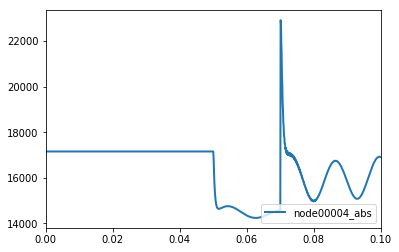

In [8]:
plot_timeseries(2, phasors['node00004']['abs'])